**DEEP LEARNING FOR AUTOMATED IDENTIFICATION OF PLANT LEAF DISEASES**

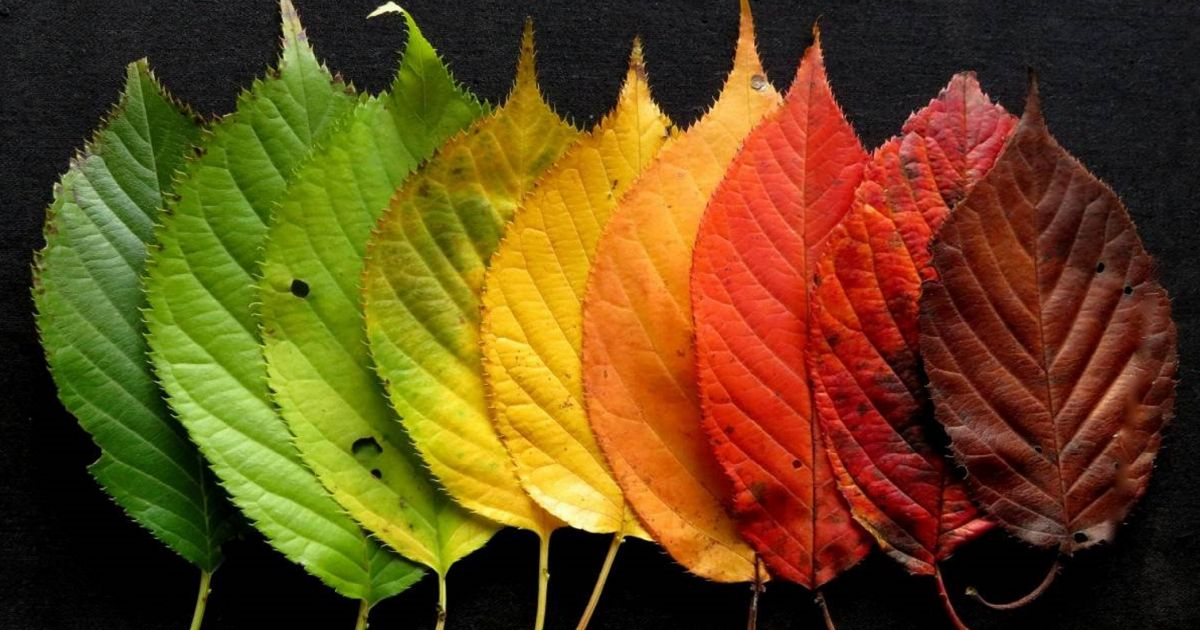


**INTRODUCTION**

The agriculture sector in Kenya is essential, contributing 20% to the GDP and indirectly affecting another 27% through related sectors. It employs over 40% of the total population and 70% of rural inhabitants. Recognizing its importance in providing livelihoods and food, the Central Bank of Kenya launched the Survey of the Agriculture Sector in July 2022. This survey, alongside the CEOs and Market Perceptions Surveys, aims to generate frequent data to inform food supply, prices, and agricultural challenges, thereby supporting monetary policy decisions.

The Economic Survey of 2022 revealed a slowdown in agricultural growth, from 5.2% in 2020 to a 0.1% contraction in 2021, mainly due to unfavorable weather, reducing crop and livestock performance. Maize production fell from 42.1 million bags in 2020 to 36.7 million in 2021, with similar trends in beans, coffee, wheat, and tea. Factors like rising input costs, leaf rust infestation, and land use shifts to real estate contributed to this decline. In 2022, the sector contracted further in the first three quarters.

The January 2023 Agriculture Sector Survey focused on recent trends in agricultural commodity prices and outputs across the country. It also assessed key food commodity availability. The survey's areas of interest included tracking commodity prices, assessing output and acreage, farm input usage, factors affecting production.

The improvement of crop yields in Kenya through technology is a critical issue, given that small farmers, who own less than five acres each, constitute up to 75% of the country's agricultural workforce. These farmers traditionally rely on outdated methods and lack access to modern technologies that could enhance productivity and ease their labor.

**Challenges in Enhancing Farming Productivity:**

Small farmers face significant challenges due to their reliance on traditional farming methods.
There is a pressing need to integrate modern technology into agriculture to increase crop yields, improve income, and reduce labor hours.

Advantech's "Farming as Business" program aims to provide data and decision-making tools to farmers in East Africa.
They offer a smartphone app providing advanced weather forecasts, market trends, and information on soil types, fertilizers, and pesticides, helping farmers make data-driven decisions.

Agriculture, a cornerstone of human sustenance, has embraced technological advancements to bolster productivity and address challenges. In this vein, the proposed project delves into the realm of plant health, specifically the early identification of leaf diseases. Acknowledging the pivotal role of timely disease detection in safeguarding crop yield, we aim to leverage deep learning, employing a deep convolutional neural network (CNN). This venture is fueled by a dataset meticulously compiled by Arun Pandian J and Geetharamani Gopal


This project seeks to leverage the power of deep learning in the field of agriculture, specifically in the area of plant disease identifications.
We are working on developing a Convolutional Neural Network (CNN) model for Advantech's mobile app, aimed at helping farmers diagnose plant diseases through image recognition, involves several steps


. This model would leverage the power of machine learning and image processing to identify various plant diseases from photos taken by farmers. This model will help in accurate and timely detection of plant diseases which plays a crucial role in ensuring food security and sustainability. With the advent of precision agriculture and the application of AI in this field, there is an opportunity to develop automated systems for early disease detection in cropsThe successful completion of this project could significantly improve disease management in crops, leading to better agricultural practices and increased yields.. s


**CITATIONS**


Kenya Agricultural & Livestock Research Organization. (n.d.). Improving Crop Yield Using Technologies. Retrieved from https://www.kari.org/improving-crop

Kenya Agribusiness and Agroindustry Alliance. (n.d.). Challenges Facing the Agricultural Sector in Kenya. Retrieved from http://kaaa.co.ke/challenges-facing-the-agricultural-sector-in-kenya


UK Government. (n.d.). Agricultural Productivity in Kenya: Barriers and Opportunities. Retrieved from https://www.gov.uk/government/publications/agricultural-productivity-in-kenya-barriers-and-opportunities


# **IMPORT LIBRARIES**

In [1]:
# Loading data Library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Computational Libraries
import os
from PIL import Image
import numpy as np
import random

# Modelling Libraries
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers

# Library to save models
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


# **LOAD THE DATA**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# dataset path
dataset_path = 'Plant_leave_diseases_dataset_with_augmentation'

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the dataset using flow_from_directory for potatoes
potato_leaf_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

Found 2400 images belonging to 3 classes.


# **EXPLORATORY DATA ANALYSIS**

### **Class Labels**

In [4]:
# Get the class labels and indices
class_labels = list(potato_leaf_generator.class_indices.keys())
class_indices = potato_leaf_generator.class_indices

print(class_labels)
print(class_indices)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


## **Visualize 3 images per class**

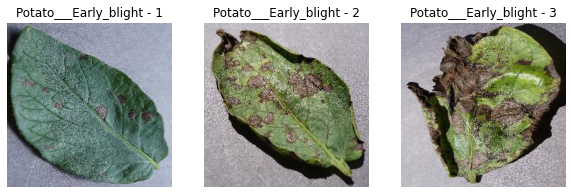

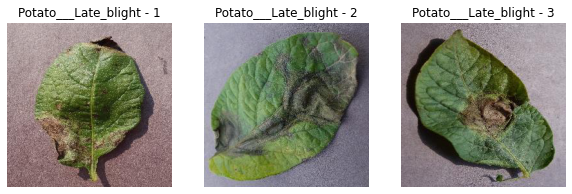

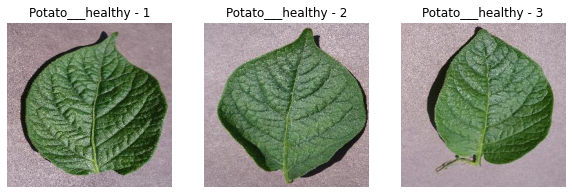

In [5]:
# Function to display images for a given class
def display_images(class_name, num_images=3):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.exists(class_path):
        print(f"Directory not found: {class_path}")
        return
    image_files = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, image_file in enumerate(image_files, 1):
        img_path = os.path.join(class_path, image_file)

        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        img = Image.open(img_path)

        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f'{class_name} - {i}')
        plt.axis('off')

    plt.show()

for class_label in class_labels:
    display_images(class_label, num_images=3)


## **Image Size Distribution**

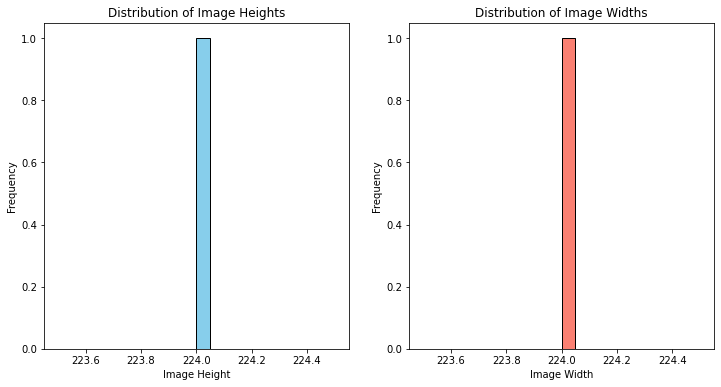

In [6]:
# Image sizes from a few samples
sample_images = potato_leaf_generator.next()[0]
image_heights = sample_images.shape[1]
image_widths = sample_images.shape[2]

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(image_heights, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Image Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_widths, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Image Width')
plt.ylabel('Frequency')

plt.show()

Observation:

The potato leaf images in our dataset have consistent dimensions, with the same height and width.

## **Aspect Ratio**

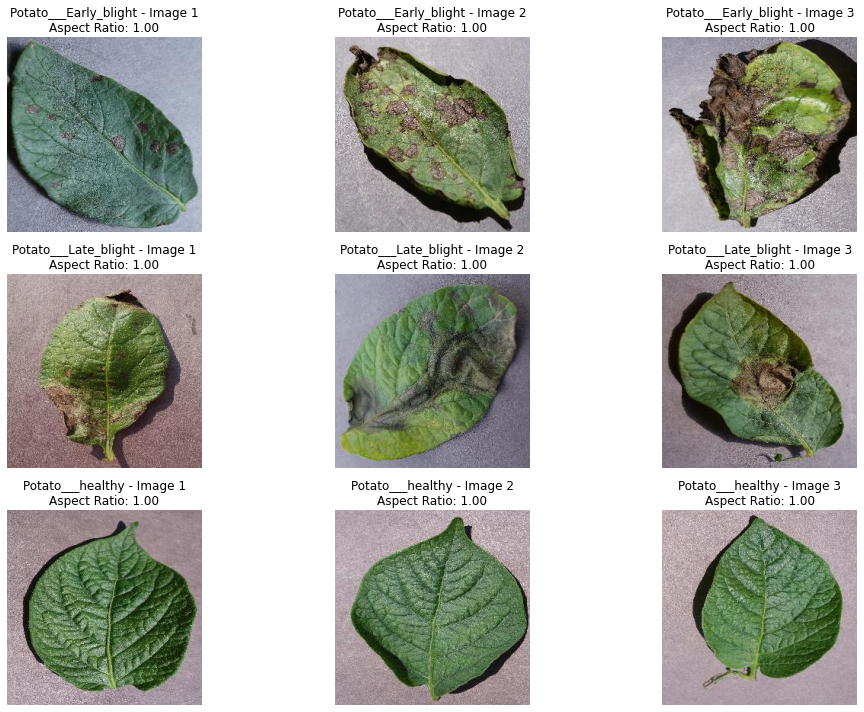

In [7]:
# Function to display aspect ratio distribution for multiple images in each class
def display_aspect_ratio_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Calculate aspect ratio
            aspect_ratio = img.shape[0] / img.shape[1]

            # Plot aspect ratio distribution
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(img)  # Show the image
            plt.title(f'{class_label} - Image {j + 1}\nAspect Ratio: {aspect_ratio:.2f}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_aspect_ratio_for_classes()



Observation:

With an aspect ratio of 1.0, the images have the same height and width. To confirm this further we will check the shape of the whole dataset. There is no need to resize or reshape the images.


## **Colour Distribution of the Images**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

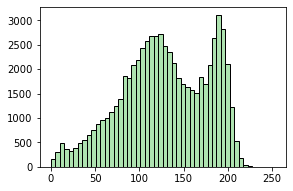

In [8]:
# Function to display color distribution for multiple images in each class
def display_color_distribution_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Reshape the image for color distribution
            flattened_image = img.reshape(-1, img.shape[-1])

            # Plot color distribution
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
            sns.histplot(flattened_image, bins=50, kde=True, palette='viridis')
            plt.title(f'{class_label} - Image {j + 1}')
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

display_color_distribution_for_classes()

Observation:

The diverse distributions across different classes suggest variations in color characteristics and patterns unique to each class. The presence of right or left skewness and different peaks indicates the diversity of color compositions within our dataset.

We will analyze the RGB distributions in various images to check if there's a consistent presence of green, yellow, and brown tints as is in our images.




<ipython-input-9-e35ee43e5170>:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\users\admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


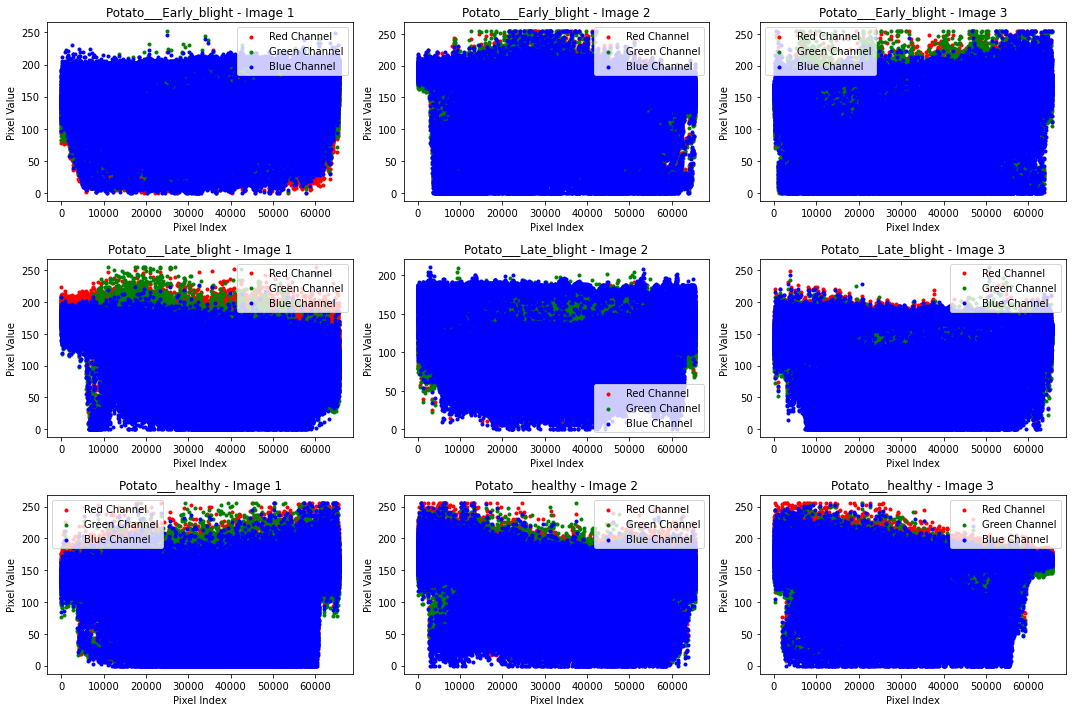

In [9]:
# Function to display RGB distributions for multiple images in each class
def display_rgb_scatter_for_classes(num_images_per_class=3):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            # Load the image and convert it to a numpy array
            img_path = os.path.join(class_path, image_file)
            img = np.array(Image.open(img_path))

            # Get RGB values for each pixel
            red_values = img[:, :, 0].flatten()
            green_values = img[:, :, 1].flatten()
            blue_values = img[:, :, 2].flatten()

            # Plot RGB distributions using scatter plots
            plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)

            plt.scatter(range(len(red_values)), red_values, color='red', marker='.', label='Red Channel')
            plt.scatter(range(len(green_values)), green_values, color='green', marker='.', label='Green Channel')
            plt.scatter(range(len(blue_values)), blue_values, color='blue', marker='.', label='Blue Channel')

            plt.title(f'{class_label} - Image {j + 1}')
            plt.xlabel('Pixel Index')
            plt.ylabel('Pixel Value')
            plt.legend()

    plt.tight_layout()
    plt.show();

display_rgb_scatter_for_classes()



Observation:

The blue channel dominance aligns with the common color characteristics of green leaves, as chlorophyll, the primary pigment responsible for photosynthesis, absorbs mostly in the blue part of the spectrum.


## **Analyze class distribution**

In [10]:
# Get the count of images for each class
class_counts = potato_leaf_generator.classes
class_labels = potato_leaf_generator.class_indices.keys()

# Create a dictionary mapping class labels to counts
class_counts_dict = {label: count for label, count in zip(class_labels, np.bincount(class_counts))}
class_counts_dict

{'Potato___Early_blight': 800,
 'Potato___Late_blight': 800,
 'Potato___healthy': 800}

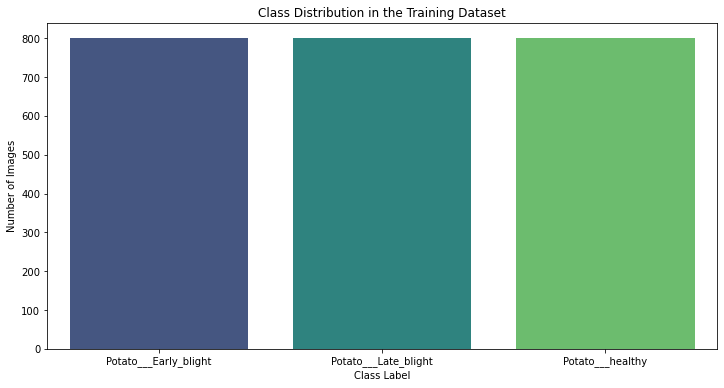

In [11]:
# Visualize the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts_dict.keys()), y=list(class_counts_dict.values()), palette='viridis')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Training Dataset')
plt.xticks(rotation='horizontal')
plt.show()

Observation:

Our dataset has a well-balanced distribution among the classes:

Potato___Early_blight: 800 images
Potato___Late_blight: 832 images
Potato___healthy: 800 images

This balanced representation provides a good foundation for training our model to recognize various aspects of early blight, late blight, and healthy potato leaves.

# **MODEL ARCHITECTURE**

## **Check GPU Availability**

GPU is a stronger processor for image classification models compared to CPU.

In [12]:
# Number of GPUs
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


## **Train and Validation Split**

In [13]:
# Set batch size and image size
batch_size = 32
image_size = (224, 224)

# Create training data
training_data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Create validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## **Basic Model - CNN**

Our CNN model will use ReLU to introduce non-linearity and capture complex patterns in hidden layers and a Softmax output layer to convert raw scores into class probabilities for multi-class classification.

In [14]:
# CNN model
num_classes = 3

# Generate the model
base_cnn_model = Sequential()
base_cnn_model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
base_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
base_cnn_model.add(Flatten())
base_cnn_model.add(Dense(128, activation='relu'))
base_cnn_model.add(Dense(num_classes, activation='softmax'))


base_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
base_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 50468227 (192.52 MB)
Trainable params: 50468227 (192.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [15]:
# Train the model
history = base_cnn_model.fit(
    training_data_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
75/75 [==============================] - 121s 2s/step - loss: 4.7082 - accuracy: 0.6179 - val_loss: 0.6039 - val_accuracy: 0.7100
Epoch 2/10
75/75 [==============================] - 110s 1s/step - loss: 0.3266 - accuracy: 0.8767 - val_loss: 0.4288 - val_accuracy: 0.8133
Epoch 3/10
75/75 [==============================] - 113s 2s/step - loss: 0.2042 - accuracy: 0.9192 - val_loss: 0.1902 - val_accuracy: 0.9217
Epoch 4/10
75/75 [==============================] - 112s 1s/step - loss: 0.1648 - accuracy: 0.9442 - val_loss: 0.3130 - val_accuracy: 0.8717
Epoch 5/10
75/75 [==============================] - 7964s 108s/step - loss: 0.1389 - accuracy: 0.9492 - val_loss: 0.1572 - val_accuracy: 0.9433
Epoch 6/10
75/75 [==============================] - 111s 1s/step - loss: 0.1142 - accuracy: 0.9558 - val_loss: 0.1479 - val_accuracy: 0.9467
Epoch 7/10
75/75 [==============================] - 111s 1s/step - loss: 0.1333 - accuracy: 0.9496 - val_loss: 0.1428 - val_accuracy: 0.9383
Epoch 8/10

### **Visualize Training Loss and Training Accuracy**

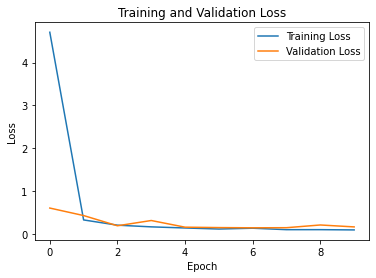

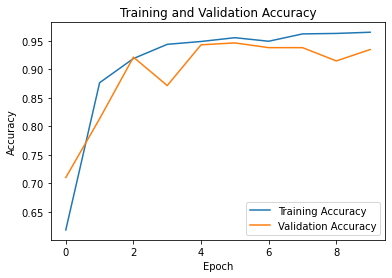

In [16]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

### **Evaluate the Basic CNN model**



In [17]:
# Evaluate the model
evaluation_results = base_cnn_model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(evaluation_results[1] * 100))
print("Validation Loss: {:.4f}".format(evaluation_results[0]))


19/19 [==============================] - 9s 483ms/step - loss: 0.1488 - accuracy: 0.9400
Validation Accuracy: 94.00%
Validation Loss: 0.1488


Observation:

Our CNN achieved 96.38% validation accuracy in classifying potato leaf diseases, but insights from the Confusion Matrix and Classification Report reveal variations in performance across classes.

We will leverage Ensembling using GoogleNet's Inception architecture. These steps aim to refine the model's ability to distinguish between healthy and diseased potato leaves.













## **GoogleNet's Inception Model**


This method ensures efficient feature extraction with its inception modules, reducing parameters for computational efficiency. Its multi-pathway design captures diverse features, providing a broader receptive field and enabling effective representation learning.

By augmenting this base with a Global Average Pooling layer and a Dense layer employing softmax activation for classification, the model adapts its knowledge to the task of identifying potato leaf diseases.

An EarlyStopping callback is implemented to curb overfitting and ensure optimal generalization during the training process.

### **Define EarlyStopping callback**

In [18]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [19]:
# Create InceptionV3 model
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_inception_model.layers:
    layer.trainable = False

# Create InceptionV3 base with custom layers
inception_model = Sequential([
    base_inception_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.summary()

87910968/87910968 [==============================] - 37s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 22065443 (84.17 MB)
Trainable params: 262659 (1.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
# Train the model
history_inception = inception_model.fit(
    training_data_generator,
    epochs=10,
    validation_data=validation_generator,
)

Epoch 1/10
75/75 [==============================] - 145s 2s/step - loss: 0.4995 - accuracy: 0.8079 - val_loss: 0.2660 - val_accuracy: 0.8950
Epoch 2/10
75/75 [==============================] - 134s 2s/step - loss: 0.2101 - accuracy: 0.9217 - val_loss: 0.2289 - val_accuracy: 0.9000
Epoch 3/10
75/75 [==============================] - 131s 2s/step - loss: 0.1586 - accuracy: 0.9388 - val_loss: 0.2785 - val_accuracy: 0.8883
Epoch 4/10
75/75 [==============================] - 152s 2s/step - loss: 0.1854 - accuracy: 0.9296 - val_loss: 0.1757 - val_accuracy: 0.9333
Epoch 5/10
75/75 [==============================] - 143s 2s/step - loss: 0.1229 - accuracy: 0.9558 - val_loss: 0.2096 - val_accuracy: 0.9250
Epoch 6/10
75/75 [==============================] - 135s 2s/step - loss: 0.1188 - accuracy: 0.9496 - val_loss: 0.2350 - val_accuracy: 0.9133
Epoch 7/10
75/75 [==============================] - 139s 2s/step - loss: 0.1103 - accuracy: 0.9617 - val_loss: 0.1783 - val_accuracy: 0.9333
Epoch 8/10
75

### **Visualize Training Loss and Training Accuracy**

In [ ]:
# Plot training loss
plt.plot(history_inception.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.title('Inception Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Inception Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Evaluate the Inception model**

In [ ]:
# Evaluate the model
evaluation_results_inception = inception_model.evaluate(validation_generator)

print("Validation Accuracy: {:.2f}%".format(evaluation_results_inception[1] * 100))
print("Validation Loss: {:.4f}".format(evaluation_results_inception[0]))

## **Save CNN and Inception models**

Prior to ensembling we need to save both models for use.

In [ ]:
# Save the models
base_cnn_model.save('saved_models/base_cnn_model.h5')
inception_model.save('saved_models/inception_model.h5')

In [ ]:
# Load the saved models
base_cnn_model = load_model('saved_models/base_cnn_model.keras')
inception_model = load_model('saved_models/inception_model.keras')

## **Ensembled - CNN and Inception Models**

In [ ]:
# Create input layer
input_layer = Input(shape=((224, 224, 3)))

# Get predictions from the base CNN model
base_cnn_predictions = base_cnn_model(input_layer)

# Get predictions from the Inception model
inception_predictions = inception_model(input_layer)

# Concatenate the predictions
concatenated_predictions = Concatenate()([base_cnn_predictions, inception_predictions])

# Add a Dense layer for final prediction
output_layer = Dense(num_classes, activation='softmax')(concatenated_predictions)

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)


ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.summary()

In [ ]:
# Train the ensemble model
history_ensemble = ensemble_model.fit(
    training_data_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


### **Visualize Training Loss and Training Accuracy**

In [ ]:
# Access the training history
history_ensemble = history.history

# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_ensemble['loss'], label='Training Loss')
plt.plot(history_ensemble['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history_ensemble['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### **Evaluate the ensembled models**

In [ ]:
# Evaluate the ensemble model
evaluation_results_ensemble = ensemble_model.evaluate(validation_generator)

print("Ensemble Model Accuracy: {:.2f}%".format(evaluation_results_ensemble[1] * 100))
print("Ensemble Model Loss: {:.4f}".format(evaluation_results_ensemble[0]))


## **TEST THE MODELS ON UNSEEN DATA**

## **Load and resize the dataset**

In [ ]:
# Create an ImageDataGenerator for unseen data
unseen_datagen = ImageDataGenerator(rescale=1./255)

# Create an unseen data generator
unseen_generator = unseen_datagen.flow_from_directory(
    'Potato-Leaf',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False )

## **Evaluation On Performance**

### **Define True Labels**

In [ ]:
# Get true labels
true_labels = unseen_generator.classes
true_labels

### **Base CNN Model**

In [ ]:
# Evaluate the Base CNN model on the unseen data
evaluation_results_base_cnn = base_cnn_model.evaluate(unseen_generator)
print("Base CNN Model Unseen Data Accuracy: {:.2f}%".format(evaluation_results_base_cnn[1] * 100))
print("Base CNN Model Unseen Data Loss: {:.4f}".format(evaluation_results_base_cnn[0]))

# Predict classes for unseen data with Base CNN model
predictions_base_cnn = base_cnn_model.predict(unseen_generator)
predicted_classes_base_cnn = np.argmax(predictions_base_cnn, axis=1)

# Generate confusion matrix and classification report for Base CNN model
conf_matrix_base_cnn = confusion_matrix(true_labels, predicted_classes_base_cnn)
class_report_base_cnn = classification_report(true_labels, predicted_classes_base_cnn)

print("Base CNN Model Confusion Matrix:\n", conf_matrix_base_cnn)
print("\nBase CNN Model Classification Report:\n", class_report_base_cnn)

### **Inception Model**

In [ ]:
# Evaluate the Inception model on the unseen data
evaluation_results_inception = inception_model.evaluate(unseen_generator)
print("Inception Model Unseen Data Accuracy: {:.2f}%".format(evaluation_results_inception[1] * 100))
print("Inception Model Unseen Data Loss: {:.4f}".format(evaluation_results_inception[0]))

# Predict classes for unseen data with Inception model
predictions_inception = inception_model.predict(unseen_generator)
predicted_classes_inception = np.argmax(predictions_inception, axis=1)

# Generate and display confusion matrix and classification report for Inception model
conf_matrix_inception = confusion_matrix(true_labels, predicted_classes_inception)
class_report_inception = classification_report(true_labels, predicted_classes_inception)

print("Inception Model Confusion Matrix:\n", conf_matrix_inception)
print("\nInception Model Classification Report:\n", class_report_inception)

### **Ensemble Model**

In [ ]:
# Evaluate the Ensemble model on the unseen data
evaluation_results_ensemble = ensemble_model.evaluate(unseen_generator)
print("Ensemble Model Unseen Data Accuracy: {:.2f}%".format(evaluation_results_ensemble[1] * 100))
print("Ensemble Model Unseen Data Loss: {:.4f}".format(evaluation_results_ensemble[0]))

# Predict classes for unseen data with Ensemble model
predictions_ensemble = ensemble_model.predict(unseen_generator)
predicted_classes_ensemble = np.argmax(predictions_ensemble, axis=1)

# Generate confusion matrix and classification report for Ensemble model
conf_matrix_ensemble = confusion_matrix(true_labels, predicted_classes_ensemble)
class_report_ensemble = classification_report(true_labels, predicted_classes_ensemble)

print("Ensemble Model Confusion Matrix:\n", conf_matrix_ensemble)
print("\nEnsemble Model Classification Report:\n", class_report_ensemble)

# **SAVE THE MODELS**

In [ ]:
# Save the models
base_cnn_model.save('saved_models/base_cnn_model.keras')
inception_model.save('saved_models/inception_model.keras')
ensemble_model.save('saved_models/ensemble_model.keras')

# **CONCLUSION**